## Examen 3
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2020_2_03_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
1) Determine el espacio de configuraciones, en los ejes $(x, \dot{x})$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.


2) Considere una muestra de Strontium-90, ${}^{98}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

# **Punto 1**

In [17]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [18]:
m= 0.2
k= 1
omega2= k/m

El movimiento está dado por la ecuación:
$$ \frac{d^2x}{dt^2}+{\omega}^2x=0$$

Hago 
$x'=y$



$y'=-{\omega}^2x$


In [90]:
def mov(U,x):
  y,z= U
  return [U[1], 
          omega2*x]

In [91]:
ini= x0,y0
ts= np.arange(0,150,0.01)

In [92]:
x0= np.random.uniform(-10,10,50)
y0= np.random.uniform(-10,10,50)

for x, y in zip(x0, y0):
  ini= [x,y]
  

In [93]:
r= integrate.odeint(mov, ini, ts)

xx, yy = r.T

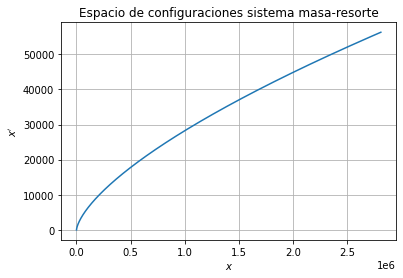

In [94]:
plt.plot(xx, yy)
plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.title('Espacio de configuraciones sistema masa-resorte')
plt.grid();

# **Punto 2**

**a) Fit y cálculo de ${\tau}$**

In [2]:
import pandas as pd
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import numpy as np

In [49]:
df= pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')

In [26]:
def N(t, tau):
  l=np.log(2)/tau
  return 1000*np.exp(-l*t)

In [34]:
a, da= optimize.curve_fit(N, df['t'], df['N(t)'])

x_l= np.linspace(0, 200)
y_m= N(x_l, *a)

El valor de ${\tau}$ corresponde a la variable 'a'.

In [75]:
print(a)

[27.99164064]


In [53]:
#Error#
tfit= N(df.t, *a)

# **b) Gráfica**

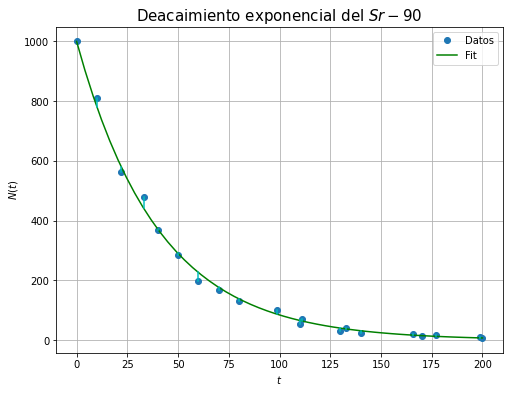

In [96]:
plt.figure(figsize=[8,6])
plt.plot(df['t'], df['N(t)'], 'o', label="Datos")
plt.plot(x_l, y_m, 'g-', label="Fit")
for i in range(df.t.size):
    plt.plot(np.array([df.t[i],df.t[i]]), np.array([df['N(t)'][i],tfit[i] ]),"c-")
plt.xlabel('$t$')
plt.ylabel('$N(t)$')
plt.legend()
plt.grid()
plt.title('Deacaimiento exponencial del $Sr-90$', fontsize=15);